In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
base_dir = "D:/JupyterLab/Nepali Currency Identifier v2/Money-v2"

In [3]:
img_height = 160
img_width = 240
bat_size = 32
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.1
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.1
)

train_datagen = train_datagen.flow_from_directory(
    base_dir,
    target_size = (img_height, img_width),
    batch_size = bat_size,
    subset = 'training',
    class_mode='categorical',
    classes=["5", "10", "20", "50", "100", "500", "1000"]  # Specify the folder order explicitly
)

test_datagen = test_datagen.flow_from_directory(
    base_dir,
    target_size = (img_height, img_width),
    batch_size = bat_size,
    subset = 'validation',
    class_mode='categorical',
    classes=["5", "10", "20", "50", "100", "500", "1000"]  # Specify the folder order explicitly
)

Found 9450 images belonging to 7 classes.
Found 1050 images belonging to 7 classes.


In [4]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(img_height, img_width, 3)),  # Define the input layer explicitly
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(7, activation='softmax')  # Final output layer for 7 classes
])

In [5]:
cnn.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [6]:
history = cnn.fit(train_datagen, epochs = 15, validation_data = test_datagen)

C:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 873ms/step - accuracy: 0.2754 - loss: 1.7525  

C:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


296/296 ━━━━━━━━━━━━━━━━━━━━ 278s 930ms/step - accuracy: 0.2759 - loss: 1.7515 - val_accuracy: 0.4381 - val_loss: 1.8850
Epoch 2/15
296/296 ━━━━━━━━━━━━━━━━━━━━ 236s 796ms/step - accuracy: 0.6988 - loss: 0.8405 - val_accuracy: 0.5781 - val_loss: 1.2933
Epoch 3/15
296/296 ━━━━━━━━━━━━━━━━━━━━ 229s 773ms/step - accuracy: 0.8060 - loss: 0.5311 - val_accuracy: 0.6705 - val_loss: 1.0343
Epoch 4/15
296/296 ━━━━━━━━━━━━━━━━━━━━ 226s 762ms/step - accuracy: 0.8472 - loss: 0.4303 - val_accuracy: 0.6076 - val_loss: 1.1344
Epoch 5/15
296/296 ━━━━━━━━━━━━━━━━━━━━ 227s 767ms/step - accuracy: 0.8695 - loss: 0.3698 - val_accuracy: 0.7467 - val_loss: 0.7615
Epoch 6/15
296/296 ━━━━━━━━━━━━━━━━━━━━ 255s 861ms/step - accuracy: 0.8941 - loss: 0.3027 - val_accuracy: 0.7210 - val_loss: 0.9555
Epoch 7/15
296/296 ━━━━━━━━━━━━━━━━━━━━ 295s 996ms/step - accuracy: 0.8965 - loss: 0.2867 - val_accuracy: 0.7333 - val_loss: 0.9327
Epoch 8/15
296/296 ━━━━━━━━━━━━━━━━━━━━ 281s 951ms/step - accuracy: 0.9139 - loss: 0.24

In [7]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 80, 120, 64)         │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 40, 60, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 20, 30, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4800)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 7)                   │          33,607 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161,591 (631.22 KB)

 Trainable params: 53,863 (210.40 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 107,728 (420.82 KB)

In [8]:
# Access the metrics
history_dict = history.history

# Extract training and validation metrics
accuracy = history_dict['accuracy']  # Training accuracy
val_accuracy = history_dict.get('val_accuracy')  # Validation accuracy
loss = history_dict['loss']  # Training loss
val_loss = history_dict.get('val_loss')  # Validation loss

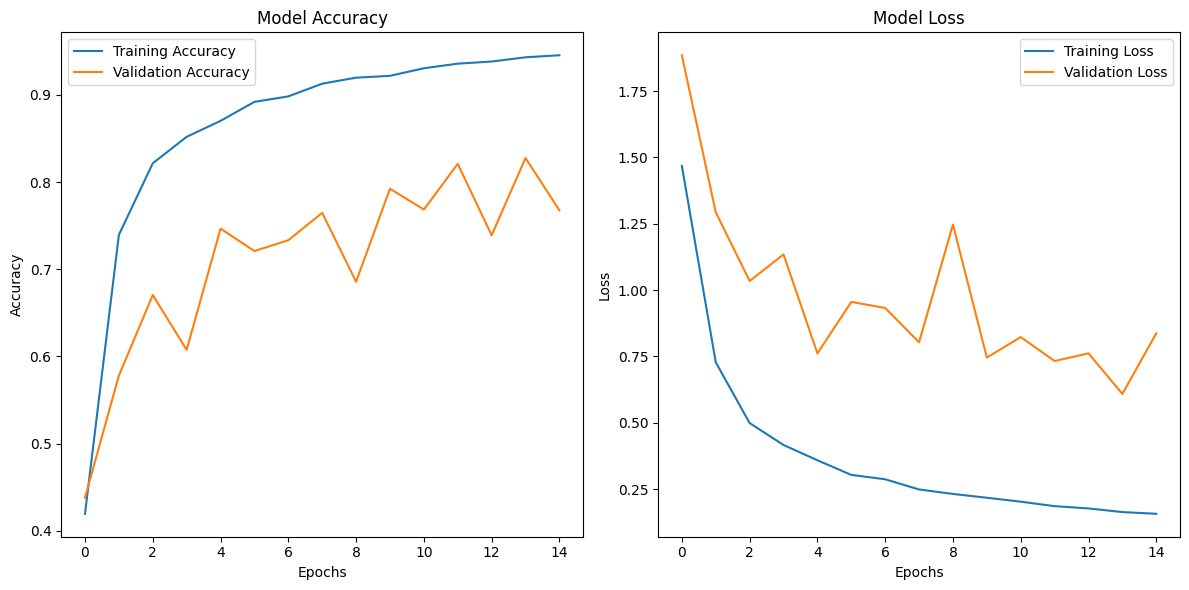

In [9]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
if val_accuracy:
    plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
if val_loss:
    plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final Training Accuracy: {final_train_accuracy:.2f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.2f}")
print(f"Final Training Loss: {final_train_loss:.2f}")
print(f"Final Validation Loss: {final_val_loss:.2f}")

Final Training Accuracy: 0.95
Final Validation Accuracy: 0.77
Final Training Loss: 0.16
Final Validation Loss: 0.84


In [12]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions
y_pred = cnn.predict(test_datagen)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels (from your test data)
y_true = test_datagen.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Classification report
report = classification_report(y_true, y_pred_classes, target_names=test_datagen.class_indices.keys())
print("Classification Report:")
print(report)

33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 456ms/step
Confusion Matrix:
[[25 20 18 13 38 19 17]
 [23 13 22 19 28 25 20]
 [16 22 20 10 34 30 18]
 [15 14 18 11 41 27 24]
 [22 15 29 14 35 16 19]
 [29 14 23 10 32 24 18]
 [26 13 20 14 40 18 19]]
Classification Report:
              precision    recall  f1-score   support

           5       0.16      0.17      0.16       150
          10       0.12      0.09      0.10       150
          20       0.13      0.13      0.13       150
          50       0.12      0.07      0.09       150
         100       0.14      0.23      0.18       150
         500       0.15      0.16      0.16       150
        1000       0.14      0.13      0.13       150

    accuracy                           0.14      1050
   macro avg       0.14      0.14      0.14      1050
weighted avg       0.14      0.14      0.14      1050



33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 385ms/step


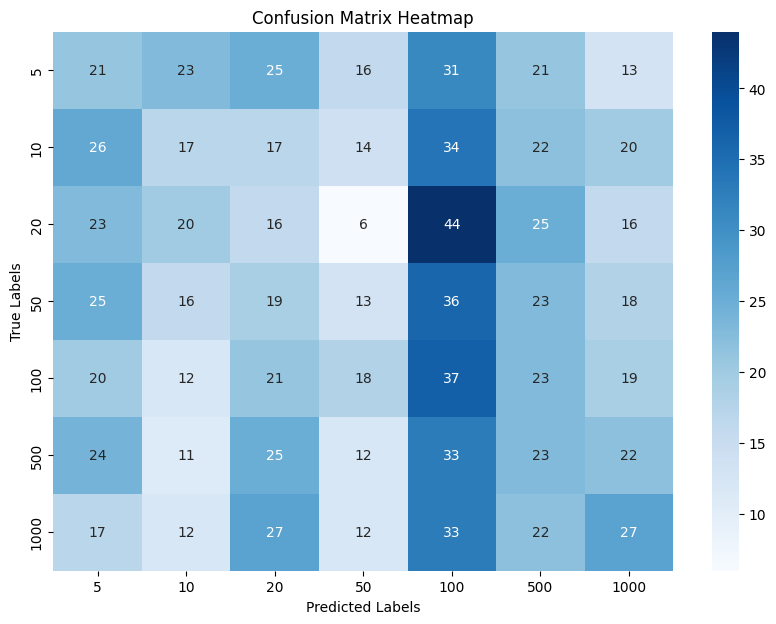

In [13]:
#confusion matrix in better graphical way
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred = cnn.predict(test_datagen)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels (from your test data)
y_true = test_datagen.classes

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_datagen.class_indices.keys(), yticklabels=test_datagen.class_indices.keys())

# Set labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Money Rs. 10
Accuracy: 100.00%


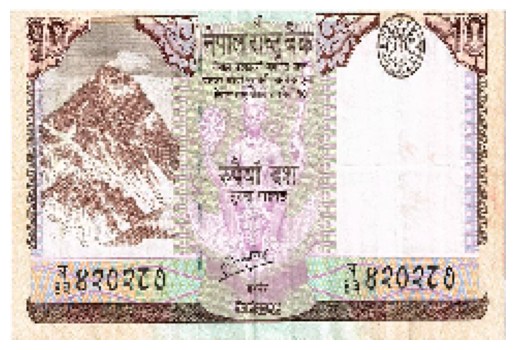

In [19]:
def predict_image(model, image_path, img_height, img_width, class_labels):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)  # Get the index of the highest probability
    predicted_accuracy = np.max(prediction)  # Get the highest probability (accuracy)

    # Display the prediction and accuracy first, then the image
    print(f"Money Rs. {class_labels[predicted_class]}")
    print(f"Accuracy: {predicted_accuracy*100:.2f}%")
    
    # Plot the image after the prediction
    plt.imshow(img)
    plt.axis('off')  # Hide the axes
    plt.show()

    return prediction, class_labels[predicted_class], predicted_accuracy

# Define class labels
class_labels = {0: "5", 1: "10", 2:"20", 3:"50", 4:"100", 5:"500", 6:"1000"}

# Path to the image you want to predict
image_path = "test images/10_11.jpg"  # Replace with the path to your image

# Call the function to predict and display the image
prediction, predicted_label, accuracy = predict_image(cnn, image_path, img_height, img_width, class_labels)

In [20]:
cnn.save('currency_identifier_model_v2.keras')